# Поиск и выбор набора данных для построения моделей машинного обучения

В качестве набора данных мы будем использовать набор данных, содержащий историю преступлений в США - https://www.kaggle.com/datasets/murderaccountability/homicide-reports


Датасет состоит из одного файла `homicideReports.csv`

Файл содержит следующие колонки:
* `Record ID` 
* `Agency Code`
* `Agency Type`
* `City`
* `State`
* `Year`
* `Month`
* `Incident`
* `Crime Type`
* `Crime Solved`
* `Victim Sex`
* `Victim Age`
* `Victim Race`
* `Victim Ethnicity`
* `Perpetrator Sex`
* `Perpetrator Age`
* `Perpetrator Race`
* `Perpetrator Ethnicity`
* `Relationship`
* `Weapon`
* `Victim Count`
* `Perperator Count`
* `record Source`


В данной работе будем решать задачи регрессии.

# Импорт библиотек

In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
%matplotlib inline 
sns.set(style="ticks")

# Загрузка данных

Загрузим файлы датасета в помощью библиотеки Pandas.

Файл представляет собой данные в формате CSV (https://ru.wikipedia.org/wiki/CSV). Часто в файлах такого формата в качестве разделителей используются символы ",", ";" или табуляция. Поэтому вызывая метод `read_csv` всегда стоит явно указывать разделитель данных с помощью параметра `sep`. Чтобы узнать какой разделитель используется в файле его рекомендуется предварительно посмотреть в любом текстовом редакторе.

In [103]:
data = pd.read_csv('../datasets/homicideReports.csv', sep=',', low_memory=False)

Поскольку набор данных очень большой, то будем использовать только первые 15000 строк

In [104]:
data = data.head(15000)

Из-за сокращения числа используемых строк, столбец `Year` теряет значимость. В данном датасете будут использоваться данные только за один период

In [105]:
data = data.drop(columns=['Year'],axis=1)

# Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.

## Основные характеристики набора данных

Первые и последние 5 строк датасета

In [106]:
data

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Month,Incident,Crime Type,Crime Solved,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,January,1,Murder or Manslaughter,Yes,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,March,1,Murder or Manslaughter,Yes,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,March,2,Murder or Manslaughter,No,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,April,1,Murder or Manslaughter,Yes,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,April,2,Murder or Manslaughter,No,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14996,NY03030,New York,Municipal Police,New York,New York,April,51,Murder or Manslaughter,No,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
14996,14997,NY03030,New York,Municipal Police,New York,New York,April,52,Murder or Manslaughter,Yes,...,Unknown,Male,19,Black,Unknown,Unknown,Handgun,0,1,FBI
14997,14998,NY03030,New York,Municipal Police,New York,New York,April,53,Murder or Manslaughter,Yes,...,Unknown,Male,20,Black,Unknown,Acquaintance,Unknown,0,0,FBI
14998,14999,NY03030,New York,Municipal Police,New York,New York,April,54,Murder or Manslaughter,Yes,...,Unknown,Female,27,Black,Unknown,Friend,Knife,0,0,FBI


Список колонок с типами данных

In [107]:
data.dtypes

Record ID                 int64
Agency Code              object
Agency Name              object
Agency Type              object
City                     object
State                    object
Month                    object
Incident                  int64
Crime Type               object
Crime Solved             object
Victim Sex               object
Victim Age                int64
Victim Race              object
Victim Ethnicity         object
Perpetrator Sex          object
Perpetrator Age          object
Perpetrator Race         object
Perpetrator Ethnicity    object
Relationship             object
Weapon                   object
Victim Count              int64
Perpetrator Count         int64
Record Source            object
dtype: object

5 первых строк датасета

In [108]:
data.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Month,Incident,Crime Type,Crime Solved,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,January,1,Murder or Manslaughter,Yes,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,March,1,Murder or Manslaughter,Yes,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,March,2,Murder or Manslaughter,No,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,April,1,Murder or Manslaughter,Yes,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,April,2,Murder or Manslaughter,No,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


Проверка на наличие пропущеных значений

In [109]:
data.isnull().sum()

Record ID                0
Agency Code              0
Agency Name              0
Agency Type              0
City                     0
State                    0
Month                    0
Incident                 0
Crime Type               0
Crime Solved             0
Victim Sex               0
Victim Age               0
Victim Race              0
Victim Ethnicity         0
Perpetrator Sex          0
Perpetrator Age          0
Perpetrator Race         0
Perpetrator Ethnicity    0
Relationship             0
Weapon                   0
Victim Count             0
Perpetrator Count        0
Record Source            0
dtype: int64

### Построение графиков для понимания структуры данных

Парные диаграммы

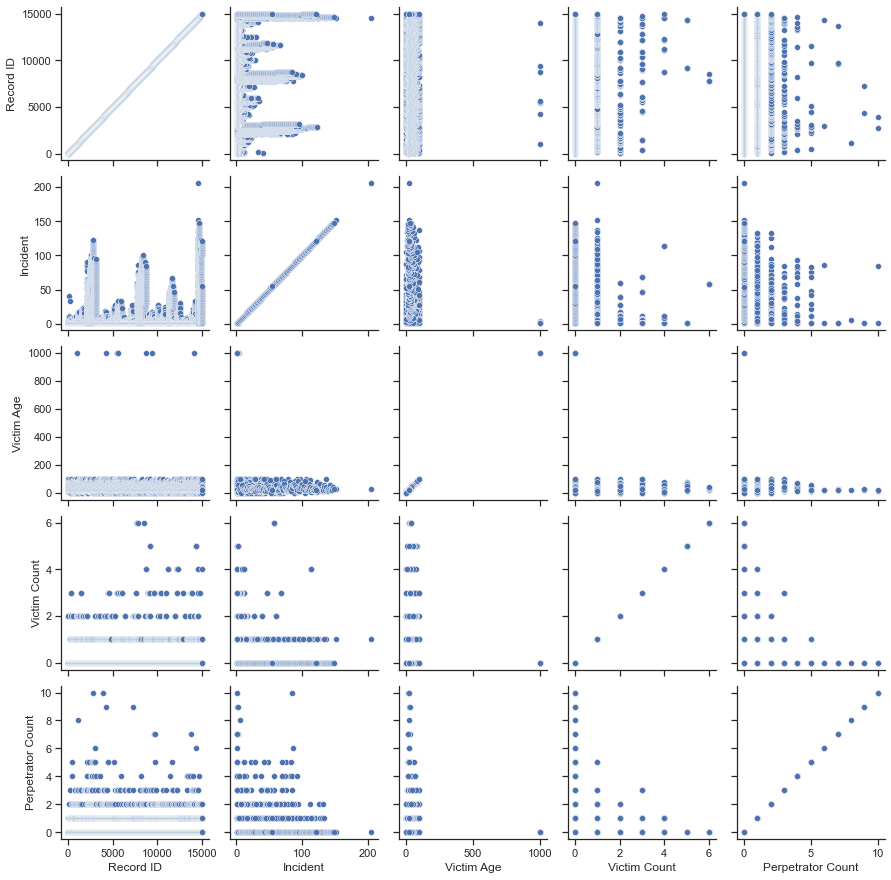

In [110]:
sns.PairGrid(data).map(sns.scatterplot)

# Обработка данных

## Кодирование категориальных признаков

In [111]:
le = LabelEncoder()
    # "Agency Name"
le.fit(data['Agency Name'].drop_duplicates()) 
data['Agency Name'] = le.transform(data['Agency Name'])
    # "City"
le.fit(data['City'].drop_duplicates()) 
data['City'] = le.transform(data['City'])
    # "Crime Type"
le.fit(data['Crime Type'].drop_duplicates()) 
data['Crime Type'] = le.transform(data['Crime Type'])
    # "Weapon"
le.fit(data['Weapon'].drop_duplicates()) 
data['Weapon'] = le.transform(data['Weapon'])

In [112]:
data_clone = data.copy()

## Масштабирование данных

Для улучшения качества алгоритмов машинного обучения отмасштабируем данные.

In [113]:
# Числовые колонки для масштабирования
scale_cols = ['Record ID', 'Incident', 'Victim Age', 'Victim Count', 'Perpetrator Count']

In [114]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data_clone[scale_cols])

Добавим масштабированные данные в набор данных

In [115]:
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    data_clone[new_col_name] = sc1_data[:,i]

In [116]:
data_clone

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Month,Incident,Crime Type,Crime Solved,...,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source,Record ID_scaled,Incident_scaled,Victim Age_scaled,Victim Count_scaled,Perpetrator Count_scaled
0,1,AK00101,41,Municipal Police,17,Alaska,January,1,1,Yes,...,Acquaintance,0,0,0,FBI,0.000000,0.000000,0.014028,0.0,0.0
1,2,AK00101,41,Municipal Police,17,Alaska,March,1,1,Yes,...,Acquaintance,13,0,0,FBI,0.000067,0.000000,0.043086,0.0,0.0
2,3,AK00101,41,Municipal Police,17,Alaska,March,2,1,No,...,Unknown,15,0,0,FBI,0.000133,0.004902,0.030060,0.0,0.0
3,4,AK00101,41,Municipal Police,17,Alaska,April,1,1,Yes,...,Acquaintance,13,0,0,FBI,0.000200,0.000000,0.043086,0.0,0.0
4,5,AK00101,41,Municipal Police,17,Alaska,April,2,1,No,...,Unknown,15,0,1,FBI,0.000267,0.004902,0.030060,0.0,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14996,NY03030,1084,Municipal Police,490,New York,April,51,1,No,...,Unknown,8,0,0,FBI,0.999733,0.245098,0.025050,0.0,0.0
14996,14997,NY03030,1084,Municipal Police,490,New York,April,52,1,Yes,...,Unknown,8,0,1,FBI,0.999800,0.250000,0.026052,0.0,0.1
14997,14998,NY03030,1084,Municipal Police,490,New York,April,53,1,Yes,...,Acquaintance,15,0,0,FBI,0.999867,0.254902,0.000000,0.0,0.0
14998,14999,NY03030,1084,Municipal Police,490,New York,April,54,1,Yes,...,Friend,9,0,0,FBI,0.999933,0.259804,0.026052,0.0,0.0


Проверяем, что масштабирование не повлияло на распределение данных

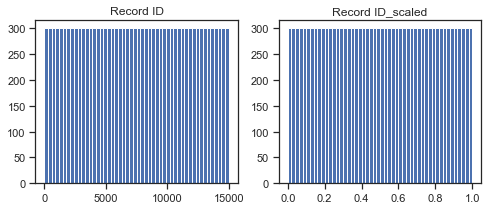

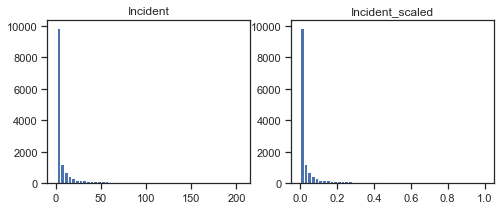

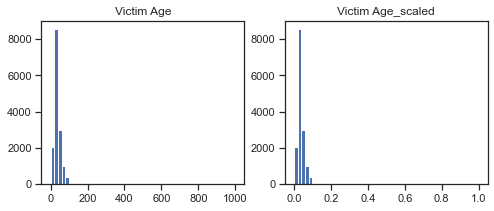

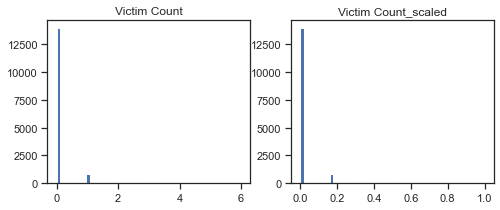

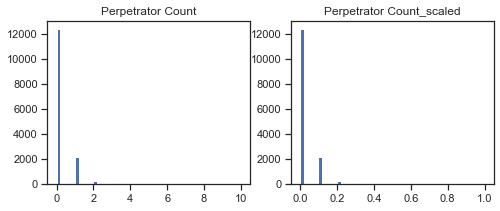

In [117]:
for col in scale_cols:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(data_clone[col], 50)
    ax[1].hist(data_clone[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

# Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения.

In [118]:
corr_cols_1 = data_clone.columns[:-6]
corr_cols_1

Index(['Record ID', 'Agency Code', 'Agency Name', 'Agency Type', 'City',
       'State', 'Month', 'Incident', 'Crime Type', 'Crime Solved',
       'Victim Sex', 'Victim Age', 'Victim Race', 'Victim Ethnicity',
       'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race',
       'Perpetrator Ethnicity', 'Relationship', 'Weapon', 'Victim Count',
       'Perpetrator Count'],
      dtype='object')

In [119]:
scale_cols_postfix = [x+'_scaled' for x in scale_cols]
corr_cols_2 = scale_cols_postfix
corr_cols_2

['Record ID_scaled',
 'Incident_scaled',
 'Victim Age_scaled',
 'Victim Count_scaled',
 'Perpetrator Count_scaled']

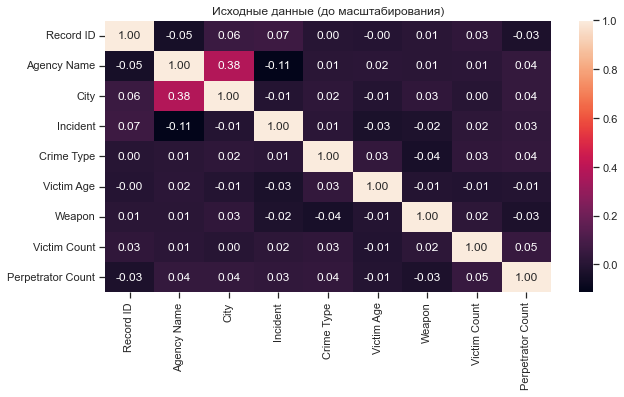

In [120]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data_clone[corr_cols_1].corr(), annot=True, fmt='.2f')
ax.set_title('Исходные данные (до масштабирования)')
plt.show()

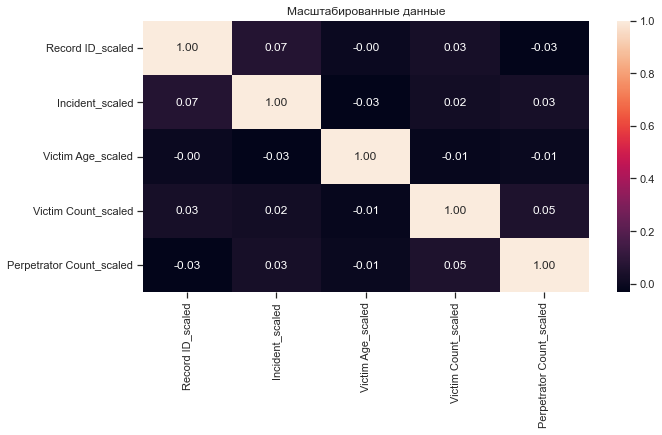

In [121]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data_clone[corr_cols_2].corr(), annot=True, fmt='.2f')
ax.set_title('Масштабированные данные')
plt.show()

# Выбор метрик для последующей оценки качества моделей.

В качестве метрик для решения задачи классификации будем использовать:

## Сохранение и визуализация метрик

Разработаем класс, который позволит сохранять метрики качества построенных моделей и реализует визуализацию метрик качества.

In [122]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = pd.concat([self.df, pd.DataFrame(temp)], ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()

# Выбор наиболее подходящих моделей для решения задачи классификации или регрессии.

Для задачи регрессии будем использовать следующие модели:

* Линейная регрессия
* Метод ближайших соседей
* Машина опорных векторов
* Решающее дерево
* Случайный лес
* Градиентный бустинг

# Формирование обучающей и тестовой выборок на основе исходного набора данных.

На основе масштабированных данных выделим обучающую и тестовую выборки с помощью фильтра

In [123]:
task_clas_cols = ["Record ID_scaled", "Victim Age_scaled", "Victim Count_scaled", "Perpetrator Count_scaled"]

In [124]:
# Выборки для задачи классификации
X_train = data_clone[task_clas_cols]
X_test = data_clone[task_clas_cols]
Y_train = data_clone['Incident_scaled']
Y_test = data_clone['Incident_scaled']
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((15000, 4), (15000, 4), (15000,), (15000,))

# Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.

Решение задачи регрессии

In [125]:
# Модели
regr_models = {'LR': LinearRegression(), 
               'KNN_5':KNeighborsRegressor(n_neighbors=5),
               'SVR':SVR(),
               'Tree':DecisionTreeRegressor(),
               'RF':RandomForestRegressor(),
               'GB':GradientBoostingRegressor()}

In [126]:
# Сохранение метрик
regrMetricLogger = MetricLogger()

In [127]:
def regr_train_model(model_name, model, regrMetricLogger):
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)

    regrMetricLogger.add('MAE', model_name, mae)
    regrMetricLogger.add('MSE', model_name, mse)
    regrMetricLogger.add('R2', model_name, r2)    
    
    print('{} \t MAE={}, MSE={}, R2={}'.format(
        model_name, round(mae, 3), round(mse, 3), round(r2, 3)))

In [128]:
for model_name, model in regr_models.items():
    regr_train_model(model_name, model, regrMetricLogger)

LR 	 MAE=0.068, MSE=0.011, R2=0.007
KNN_5 	 MAE=0.022, MSE=0.002, R2=0.792
SVR 	 MAE=0.084, MSE=0.011, R2=0.03
Tree 	 MAE=0.0, MSE=0.0, R2=1.0
RF 	 MAE=0.003, MSE=0.0, R2=0.992
GB 	 MAE=0.027, MSE=0.002, R2=0.798


# Подбор гиперпараметров для выбранных моделей с использованием методов кросс-валидации.

In [129]:
n_range = np.array(range(1,1000,5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([  1,   6,  11,  16,  21,  26,  31,  36,  41,  46,  51,  56,  61,
          66,  71,  76,  81,  86,  91,  96, 101, 106, 111, 116, 121, 126,
         131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191,
         196, 201, 206, 211, 216, 221, 226, 231, 236, 241, 246, 251, 256,
         261, 266, 271, 276, 281, 286, 291, 296, 301, 306, 311, 316, 321,
         326, 331, 336, 341, 346, 351, 356, 361, 366, 371, 376, 381, 386,
         391, 396, 401, 406, 411, 416, 421, 426, 431, 436, 441, 446, 451,
         456, 461, 466, 471, 476, 481, 486, 491, 496, 501, 506, 511, 516,
         521, 526, 531, 536, 541, 546, 551, 556, 561, 566, 571, 576, 581,
         586, 591, 596, 601, 606, 611, 616, 621, 626, 631, 636, 641, 646,
         651, 656, 661, 666, 671, 676, 681, 686, 691, 696, 701, 706, 711,
         716, 721, 726, 731, 736, 741, 746, 751, 756, 761, 766, 771, 776,
         781, 786, 791, 796, 801, 806, 811, 816, 821, 826, 831, 836, 841,
         846, 851, 856,

In [130]:
%%time
regr_gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=5, scoring='neg_mean_squared_error')
regr_gs.fit(X_train, Y_train)

CPU times: total: 5min 10s
Wall time: 5min 10s


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': array([  1,   6,  11,  16,  21,  26,  31,  36,  41,  46,  51,  56,  61,
        66,  71,  76,  81,  86,  91,  96, 101, 106, 111, 116, 121, 126,
       131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191,
       196, 201, 206, 211, 216, 221, 226, 231, 236, 241, 246, 251, 256,
       261, 266, 271, 276, 281, 286, 291, 296, 301, 306, 311, 316, 321,
       326, 331, 336, 341, 346, 351, 356,...
       586, 591, 596, 601, 606, 611, 616, 621, 626, 631, 636, 641, 646,
       651, 656, 661, 666, 671, 676, 681, 686, 691, 696, 701, 706, 711,
       716, 721, 726, 731, 736, 741, 746, 751, 756, 761, 766, 771, 776,
       781, 786, 791, 796, 801, 806, 811, 816, 821, 826, 831, 836, 841,
       846, 851, 856, 861, 866, 871, 876, 881, 886, 891, 896, 901, 906,
       911, 916, 921, 926, 931, 936, 941, 946, 951, 956, 961, 966, 971,
       976, 981, 986, 991, 996])}],
             scoring='neg_mean_squ

In [131]:
# Лучшая модель
regr_gs.best_estimator_

KNeighborsRegressor(n_neighbors=996)

In [132]:
# Лучшее значение параметров
regr_gs.best_params_

{'n_neighbors': 996}

In [133]:
regr_gs_best_params_txt = str(regr_gs.best_params_['n_neighbors'])
regr_gs_best_params_txt

'996'

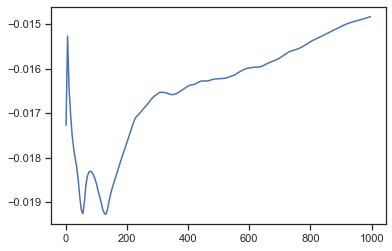

In [134]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, regr_gs.cv_results_['mean_test_score'])

# Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.

In [135]:
regr_models_grid = {'KNN_5':KNeighborsRegressor(n_neighbors=5), str('KNN_'+regr_gs_best_params_txt):regr_gs.best_estimator_}

In [136]:
for model_name, model in regr_models_grid.items():
    regr_train_model(model_name, model, regrMetricLogger)

KNN_5 	 MAE=0.022, MSE=0.002, R2=0.792
KNN_996 	 MAE=0.049, MSE=0.007, R2=0.37


# Формирование выводов о качестве построенных моделей на основе выбранных метрик.

Метрики качества модели

In [137]:
regr_metrics = regrMetricLogger.df['metric'].unique()
regr_metrics

array(['MAE', 'MSE', 'R2'], dtype=object)

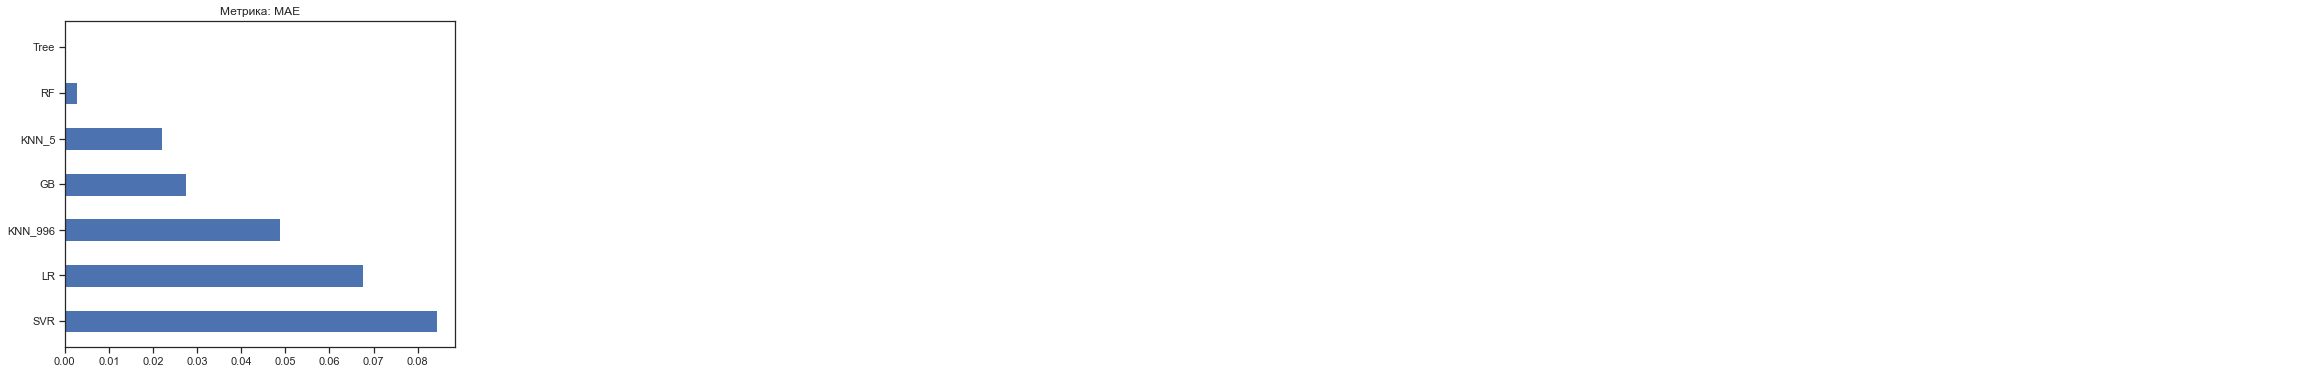

In [138]:
regrMetricLogger.plot('Метрика: ' + 'MAE', 'MAE', ascending=False, figsize=(7, 6))

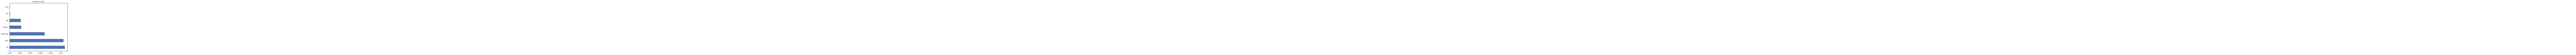

In [139]:
regrMetricLogger.plot('Метрика: ' + 'MSE', 'MSE', ascending=False, figsize=(7, 6))

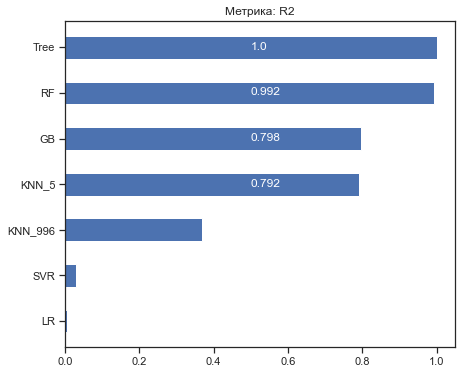

In [140]:
regrMetricLogger.plot('Метрика: ' + 'R2', 'R2', ascending=True, figsize=(7, 6))

# Вывод

На основании двух метрик из трёх используемых, лучшей оказалась модель на основе метода опорных векторов (SVR)